Tiffany Kashima

Homework 4 STP494

### Using LASSO and polynomial terms in Linear Regression to fit the used car data

In [446]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [268]:
# random number 
rdm = 123

In [269]:
# read in data set
df = pd.read_csv("/Users/tk/ASU/STP494/data/susedcars.csv")

In [270]:
# preview data
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


In [271]:
# data looks good - no null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   int64  
 1   trim          1000 non-null   object 
 2   isOneOwner    1000 non-null   object 
 3   mileage       1000 non-null   float64
 4   year          1000 non-null   int64  
 5   color         1000 non-null   object 
 6   displacement  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [272]:
# dimensions of data
df.shape

(1000, 7)

In [273]:
# explore features
df.columns

Index(['price', 'trim', 'isOneOwner', 'mileage', 'year', 'color',
       'displacement'],
      dtype='object')

In [274]:
# separate numeric and categorical variables
num = ['year', 'mileage', 'price']
cat = ['trim', 'isOneOwner', 'color', 'displacement']

In [275]:
# summary stats on numeric variables
df[num].describe()

,year,mileage,price
count,1000.000000,1000.000000,1000.000000
mean,2006.939000,73652.408000,30583.318000
std,4.194624,42887.422189,18411.018385
min,1994.000000,1997.000000,995.000000
25%,2004.000000,40132.750000,12995.000000
50%,2007.000000,67919.500000,29800.000000
75%,2010.000000,100138.250000,43992.000000
max,2013.000000,255419.000000,79995.000000


In [276]:
# look at quantiles
df[num].quantile(np.arange(0.0, 1.1, 0.1))


,year,mileage,price
0.0,1994.0,1997.0,995.0
0.1,2001.0,23079.3,7976.8
0.2,2003.0,35157.4,10999.0
0.3,2006.0,45382.1,15995.0
0.4,2007.0,58053.8,24995.0
0.5,2007.0,67919.5,29800.0
0.6,2008.0,79940.8,34895.0
0.7,2010.0,92041.4,39900.0
0.8,2011.0,107458.4,47800.0
0.9,2012.0,128581.3,56999.0


In [277]:
for i in cat:
    print(df.groupby(i).mean())

              price        mileage         year
trim                                           
430    10468.818182  112957.244755  2003.111888
500    10597.307087  109595.125984  2002.070866
550    40260.978003   54184.181049  2009.441624
other  28389.791367   83151.726619  2004.683453
                   price       mileage         year
isOneOwner                                         
f           28356.922711  78638.519620  2006.476813
t           42359.408805  47279.327044  2009.383648
               price       mileage         year
color                                          
Black   34592.416867  66827.231325  2007.913253
Silver  24977.962441  82252.070423  2005.892019
White   34780.675862  68538.896552  2007.337931
other   25832.427313  81327.207048  2005.885463
                     price        mileage         year
displacement                                          
4.6           58360.007299   25519.897810  2012.430657
5.5           34939.285714   62639.182773  2008.470

Text(0, 0.5, 'Price')

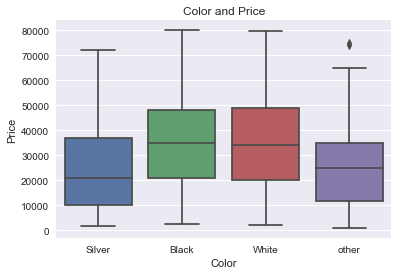

In [278]:
# 
sns.boxplot(x='color', y='price', data=df)
plt.title('Color and Price')
plt.xlabel('Color')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

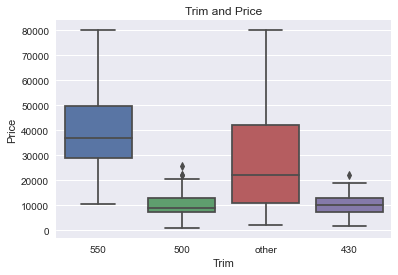

In [279]:
sns.boxplot(x='trim', y='price', data=df)
plt.title('Trim and Price')
plt.xlabel('Trim')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

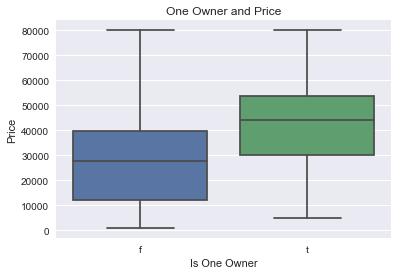

In [280]:
sns.boxplot(x='isOneOwner', y='price', data=df)
plt.title('One Owner and Price')
plt.xlabel('Is One Owner')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

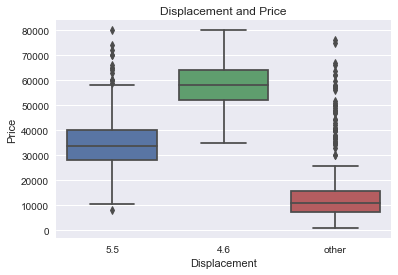

In [281]:
sns.boxplot(x='displacement', y='price', data=df)
plt.title('Displacement and Price')
plt.xlabel('Displacement')
plt.ylabel('Price')

<AxesSubplot:xlabel='price', ylabel='Count'>

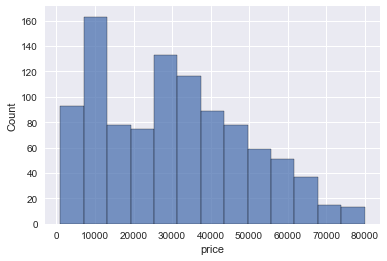

In [282]:
# 
sns.histplot(x='price', data=df)

<AxesSubplot:xlabel='year', ylabel='Count'>

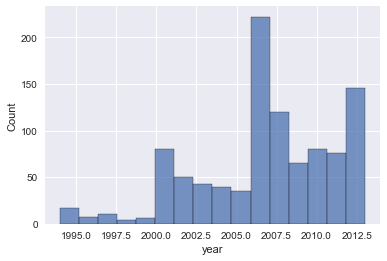

In [283]:
# 
sns.histplot(x='year', data=df)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

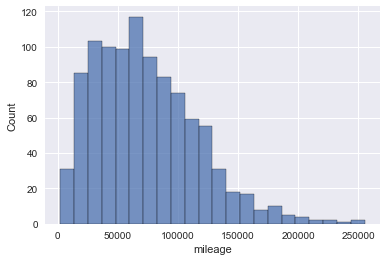

In [284]:
# 
sns.histplot(x='mileage', data=df)

<AxesSubplot:xlabel='mileage', ylabel='price'>

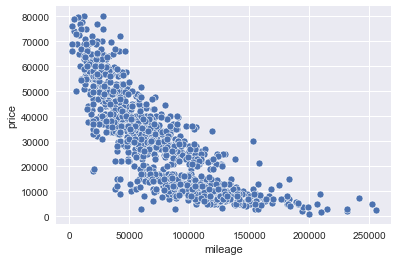

In [285]:
#
sns.scatterplot(x='mileage', y='price', data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

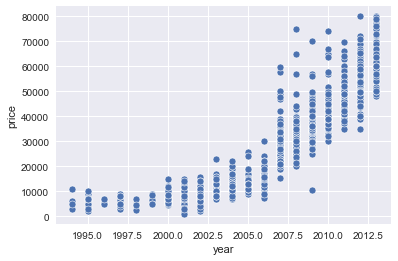

In [286]:
#
sns.scatterplot(x='year', y='price', data=df)

In [287]:
# Do some data pre-processing for linear regression

# one hot encode the categorical variables using pandas
df = pd.get_dummies(df, columns=cat, prefix=cat)

In [288]:
df

,price,mileage,year,trim_430,trim_500,trim_550,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
0,43995,36858.0,2008,0,0,1,0,1,0,0,1,0,0,0,1,0
1,44995,46883.0,2012,0,0,1,0,1,0,1,0,0,0,1,0,0
2,25999,108759.0,2007,0,0,1,0,1,0,0,0,1,0,0,1,0
3,33880,35187.0,2007,0,0,1,0,1,0,1,0,0,0,0,1,0
4,34895,48153.0,2007,0,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,36995,89589.0,2007,0,0,1,0,1,0,1,0,0,0,0,1,0
996,72991,5562.0,2013,0,0,1,0,1,0,1,0,0,0,1,0,0
997,38990,61716.0,2010,0,0,1,0,1,0,0,0,0,1,0,1,0
998,58998,40219.0,2012,0,0,1,0,1,0,1,0,0,0,1,0,0


In [289]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1000 non-null   int64  
 1   mileage             1000 non-null   float64
 2   year                1000 non-null   int64  
 3   trim_430            1000 non-null   uint8  
 4   trim_500            1000 non-null   uint8  
 5   trim_550            1000 non-null   uint8  
 6   trim_other          1000 non-null   uint8  
 7   isOneOwner_f        1000 non-null   uint8  
 8   isOneOwner_t        1000 non-null   uint8  
 9   color_Black         1000 non-null   uint8  
 10  color_Silver        1000 non-null   uint8  
 11  color_White         1000 non-null   uint8  
 12  color_other         1000 non-null   uint8  
 13  displacement_4.6    1000 non-null   uint8  
 14  displacement_5.5    1000 non-null   uint8  
 15  displacement_other  1000 non-null   uint8  
dtypes: floa

In [290]:
# store columns just in case we need to refer to them or relabel data set
columns = df.iloc[:,1:16].columns

In [291]:
columns

Index(['mileage', 'year', 'trim_430', 'trim_500', 'trim_550', 'trim_other',
       'isOneOwner_f', 'isOneOwner_t', 'color_Black', 'color_Silver',
       'color_White', 'color_other', 'displacement_4.6', 'displacement_5.5',
       'displacement_other'],
      dtype='object')

In [292]:
# create target and feature arrays
y = df[['price']]
X = df.iloc[:,1:16]

In [293]:
# make train, test splits with shuffled data
trainX, testX, trainy, testy = train_test_split(X, y, test_size=.2, random_state=rdm, shuffle=True)

In [294]:
trainX.head()

,mileage,year,trim_430,trim_500,trim_550,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
512,27190.0,2010,0,0,1,0,1,0,0,0,0,1,0,1,0
685,122000.0,2005,0,1,0,0,1,0,0,0,0,1,0,0,1
997,61716.0,2010,0,0,1,0,1,0,0,0,0,1,0,1,0
927,43600.0,2011,0,0,1,0,0,1,1,0,0,0,0,1,0
376,78126.0,2003,1,0,0,0,1,0,1,0,0,0,0,0,1


In [295]:
# create polynomial and interaction terms, degree 4

ply = PolynomialFeatures(degree=4)

trainX_poly = ply.fit_transform(trainX.iloc[:,0:2])
testX_poly = ply.transform(testX.iloc[:,0:2])

In [296]:
# create list of new column names for X
trans_cols = list(ply.get_feature_names())+list(trainX.iloc[:,2:].columns)

In [297]:
dm = trainX.iloc[:,2:].to_numpy()
dm2 = testX.iloc[:,2:].to_numpy()

In [298]:
# create transformed data frame for trainX and check
trainX_poly = pd.DataFrame(np.hstack((trainX_poly, dm)), columns=trans_cols)
trainX_poly.head()

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
0,1.0,27190.0,2010.0,7.392961e+08,54651900.0,4040100.0,2.010146e+13,1.485985e+12,1.098503e+11,8.120601e+09,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,122000.0,2005.0,1.488400e+10,244610000.0,4020025.0,1.815848e+15,2.984242e+13,4.904430e+11,8.060150e+09,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,61716.0,2010.0,3.808865e+09,124049160.0,4040100.0,2.350679e+14,7.655818e+12,2.493388e+11,8.120601e+09,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,43600.0,2011.0,1.900960e+09,87679600.0,4044121.0,8.288186e+13,3.822831e+12,1.763237e+11,8.132727e+09,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,78126.0,2003.0,6.103672e+09,156486378.0,4012009.0,4.768555e+14,1.222565e+13,3.134422e+11,8.036054e+09,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [299]:
# create transformed data frame for testX and check
testX_poly = pd.DataFrame(np.hstack((testX_poly, dm2)), columns=trans_cols)
testX_poly.head()

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
0,1.0,4171.0,2010.0,1.739724e+07,8383710.0,4040100.0,7.256389e+10,3.496845e+10,1.685126e+10,8.120601e+09,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,129481.0,2007.0,1.676533e+10,259868367.0,4028049.0,2.170792e+15,3.364802e+13,5.215558e+11,8.084294e+09,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,122623.0,2000.0,1.503640e+10,245246000.0,4000000.0,1.843808e+15,3.007280e+13,4.904920e+11,8.000000e+09,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,40421.0,2008.0,1.633857e+09,81165368.0,4032064.0,6.604214e+13,3.280785e+12,1.629801e+11,8.096385e+09,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,84223.0,2008.0,7.093514e+09,169119784.0,4032064.0,5.974370e+14,1.424378e+13,3.395925e+11,8.096385e+09,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [300]:
trainX_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   1                   800 non-null    float64
 1   x0                  800 non-null    float64
 2   x1                  800 non-null    float64
 3   x0^2                800 non-null    float64
 4   x0 x1               800 non-null    float64
 5   x1^2                800 non-null    float64
 6   x0^3                800 non-null    float64
 7   x0^2 x1             800 non-null    float64
 8   x0 x1^2             800 non-null    float64
 9   x1^3                800 non-null    float64
 10  x0^4                800 non-null    float64
 11  x0^3 x1             800 non-null    float64
 12  x0^2 x1^2           800 non-null    float64
 13  x0 x1^3             800 non-null    float64
 14  x1^4                800 non-null    float64
 15  trim_430            800 non-null    float64
 16  trim_500

In [301]:
# fit scaler on training data only
ss = StandardScaler()
ss.fit(trainX_poly.iloc[:,1:15])

StandardScaler()

In [302]:
%%capture --no-display
# transform train/test feature data using the scaler that was fitted on train data
trainX_poly.iloc[:,1:15] = ss.transform(trainX_poly.iloc[:,1:15])
testX_poly.iloc[:,1:15] = ss.transform(testX_poly.iloc[:,1:15])

In [303]:
trainX_poly

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
0,1.0,-1.084998,0.731568,-0.776180,-1.086385,0.731641,-0.521355,-0.777165,-1.087766,0.731712,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.090537,-0.457007,0.860901,1.093302,-0.458187,0.529577,0.863372,1.096056,-0.459366,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,-0.292756,0.731568,-0.420914,-0.290082,0.731641,-0.395549,-0.420215,-0.287388,0.731712,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,-0.708450,0.969282,-0.641732,-0.707407,0.969962,-0.484614,-0.641969,-0.706345,0.970640,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.083793,-0.932437,-0.155318,0.082121,-0.933289,-0.254047,-0.155831,0.080434,-0.934137,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,-0.576670,0.969282,-0.579954,-0.574885,0.969962,-0.462811,-0.579868,-0.573079,0.970640,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
796,1.0,-1.408701,0.969282,-0.841935,-1.411598,0.969962,-0.531809,-0.843222,-1.414491,0.970640,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
797,1.0,-0.558335,0.018423,-0.570754,-0.558749,0.017389,-0.459340,-0.571201,-0.559162,0.016354,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,1.0,0.863506,0.256138,0.592823,0.869535,0.255354,0.291430,0.596875,0.875578,0.254569,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [304]:
testX_poly

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,trim_other,isOneOwner_f,isOneOwner_t,color_Black,color_Silver,color_White,color_other,displacement_4.6,displacement_5.5,displacement_other
0,1.0,-1.613198,0.731568,-0.859732,-1.617293,0.731641,-0.533077,-0.861113,-1.621389,0.731712,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.262197,0.018423,1.078642,1.268385,0.017389,0.737302,1.083542,1.274579,0.016354,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.104832,-1.645581,0.878539,1.100600,-1.645052,0.545941,0.876701,1.096336,-1.644517,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,-0.781396,0.256138,-0.672646,-0.782155,0.255354,-0.494469,-0.673329,-0.782910,0.254569,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.223696,0.256138,-0.040755,0.227084,0.255354,-0.183479,-0.039074,0.230483,0.254569,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.248843,-0.932437,1.061238,1.249066,-0.933289,0.720248,1.062236,1.249264,-0.934137,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
196,1.0,-0.466137,0.493853,-0.522250,-0.464974,0.493438,-0.440144,-0.522201,-0.463799,0.493022,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
197,1.0,-0.435573,0.018423,-0.505346,-0.435542,0.017389,-0.433114,-0.505581,-0.435509,0.016354,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
198,1.0,0.405315,-2.834156,0.120803,0.395709,-2.828954,-0.075350,0.116704,0.386091,-2.823758,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [305]:
# Building Linear Model with polynomial terms

rg = linear_model.LinearRegression()
rg.fit(trainX_poly, trainy)
yhattr = rg.predict(trainX_poly)
yhatte = rg.predict(testX_poly)

In [306]:
# The intercept
print('Interccept: \n', rg.intercept_)
# The coefficients
print('Coefficients: \n', rg.coef_)

Interccept: 
 [24966.6655798]
Coefficients: 
 [[ 5.68594809e+03 -1.93899255e+10  1.87741356e+11  2.01872310e+08
   5.76107853e+10 -5.64491804e+11  2.55568385e+05 -4.03911795e+08
  -5.70528524e+10  5.65758381e+11 -5.05986104e+03 -2.46957149e+05
   2.02039328e+08  1.88319837e+10 -1.89007919e+11 -5.77905824e+03
  -4.84551288e+03 -5.51912180e+03  1.21136904e+03 -2.93454336e+03
  -2.20948056e+03 -9.23880555e+03 -9.73949572e+03 -7.51493046e+03
  -9.43783379e+03  1.92775470e+04  1.68752635e+04  1.44793648e+04]]


In [307]:
print('Train RMSE: %.2f' % mean_squared_error(yhattr, trainy, squared=False))
print('Train R^2: %.2f' % r2_score(trainy, yhattr))

print('Test RMSE: %.2f' % mean_squared_error(yhatte, testy, squared=False))
print('Test R^2: %.2f' % r2_score(testy, yhatte))

Train RMSE: 5070.98
Train R^2: 0.92
Test RMSE: 5355.02
Test R^2: 0.92


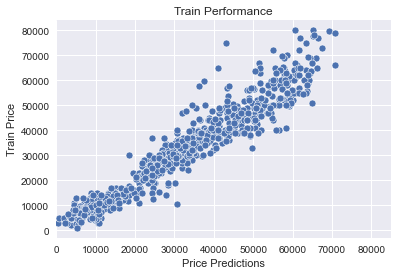

In [308]:
sns.scatterplot(x=yhattr[:,0], y=trainy.iloc[:,0])
plt.title("Train Performance")
plt.xlim((0,85000))
plt.xlabel("Price Predictions")
plt.ylabel("Train Price")
plt.show()

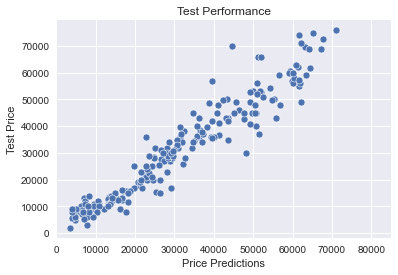

In [309]:
sns.scatterplot(x=yhatte[:,0], y=testy.iloc[:,0])
plt.title("Test Performance")
plt.xlim((0,85000))
plt.xlabel("Price Predictions")
plt.ylabel("Test Price")
plt.show()

In [310]:
# This model performed pretty well.  However, there are numerous features which could hamper not only computational complexity but interpretibility
# Use L1/LASSO regularization on linear regression to see if we can caputure the signal with a more parsimonious model

# reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

In [430]:
%%capture
# First using AIC 
ls = LassoLarsIC(criterion='aic')
ls.fit(trainX_poly.to_numpy(), trainy.to_numpy().ravel())

results = pd.DataFrame(
    {
        "alphas": ls.alphas_,
        "AIC criterion": ls.criterion_,
    }
).set_index("alphas")
alpha_aic = ls.alpha_

In [432]:
%%capture
# Using BIC
ls.set_params()
ls.set_params(criterion="bic").fit(trainX_poly.to_numpy(), trainy.to_numpy().ravel())
results["BIC criterion"] = ls.criterion_
alpha_bic = ls.alpha_

In [433]:
# script to find best alpha
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]

results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
570.7194144764698,800.000000,800.000000
387.64193363460754,466.850940,471.535551
382.895930364359,460.789558,470.158781
382.88154744543755,460.761258,470.130481
377.3191339639104,451.430572,460.799796
377.2882504490273,451.370452,460.739676
174.0144146180099,203.837868,213.207092
97.73939626400717,149.026882,163.080717
68.45435889853718,133.833074,152.571521


In [434]:
# The best alpha for AIC is: 4.364110612793435
# The best alpha for BIC is: 44.205956801356876

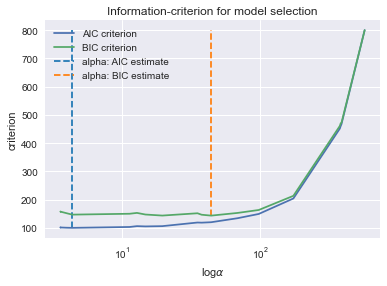

In [442]:
# plot AIC and  BIC results, vertical lines each represent where AIC and BIC values have the best alpha value, compare AIC and BIC values 
# vs log(alpha) results to visualize optimum value
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel("log"r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection"
)

In [488]:
# Use AIC alpha on train and test data

aicmod = Lasso(alpha=4, random_state=rdm, max_iter=100000)
aicmod.fit(trainX_poly, trainy)
yhataic = aicmod.predict(testX_poly)

In [495]:
# Use BIC alpha on train and test data

bicmod = Lasso(alpha=44, random_state=rdm, max_iter=100000)
bicmod.fit(trainX_poly, trainy)
yhatbic = bicmod.predict(testX_poly)

In [ ]:
# get RMSE for AIC
rmse(yhataic, testy.to_numpy().ravel())

5764.171922178774

In [496]:
# get RMSE for BIC
rmse(yhatbic, testy.to_numpy().ravel())

5874.225504003391

In [491]:
# get coefficients for model using AIC alpha
coeffaic = list(aicmod.coef_)

In [497]:
# get coefficients for model using AIC alpha
coeffbic = list(bicmod.coef_)

In [492]:
# examine non zero coefficients used in AIC
sigvarsaic = {poly_names[i]:coeffaic[i] for i in range(len(poly_names))}
sigvarsaic

{'1': 0.0,
 'x0': 0.0,
 'x1': -0.0,
 'x0^2': 20101.3837361162,
 'x0 x1': -0.0,
 'x1^2': 0.0,
 'x0^3': -0.0,
 'x0^2 x1': 0.0,
 'x0 x1^2': -9690.549865186484,
 'x1^3': 4271.75385024792,
 'x0^4': -5189.64251731392,
 'x0^3 x1': -0.0,
 'x0^2 x1^2': -0.0,
 'x0 x1^3': -11563.515349382658,
 'x1^4': 5279.864173132488}

In [498]:
# examine non zero coefficients used in BIC
sigvarsbic = {poly_names[i]:coeffbic[i] for i in range(len(poly_names))}
sigvarsbic

{'1': 0.0,
 'x0': -0.0,
 'x1': 0.0,
 'x0^2': 13061.872218746823,
 'x0 x1': -0.0,
 'x1^2': 0.0,
 'x0^3': 0.0,
 'x0^2 x1': 0.0,
 'x0 x1^2': -0.0,
 'x1^3': 0.0,
 'x0^4': -2100.547923186641,
 'x0^3 x1': 0.0,
 'x0^2 x1^2': 0.0,
 'x0 x1^3': -16830.120481505255,
 'x1^4': 9724.47789748291}

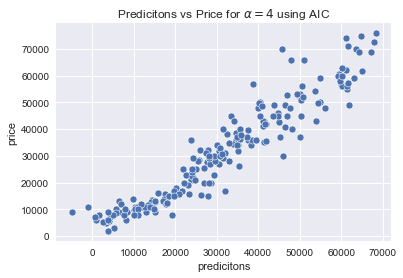

In [493]:
# graph predictions versus price in test data for AIC alpha

sns.scatterplot(x=yhataic, y=testy.to_numpy().ravel())
plt.xlabel("predicitons")
plt.ylabel("price")
plt.title("Predicitons vs Price for " r"$\alpha=4$" " using AIC")
plt.show()

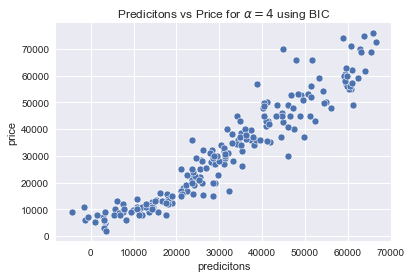

In [500]:
# graph predictions versus price in test data for BIC alpha

sns.scatterplot(x=yhatbic, y=testy.to_numpy().ravel())
plt.xlabel("predicitons")
plt.ylabel("price")
plt.title("Predicitons vs Price for " r"$\alpha=4$" " using BIC")
plt.show()

In [499]:
print("The RMSE on test data for AIC alpha = 16 with LassoCV is: %.2f" % rmse(yhataic, testy.to_numpy().ravel()))
print("The RMSE on test data for BIC alpha = 44 with LassoCV is: %.2f" % rmse(yhatbic, testy.to_numpy().ravel()))

The RMSE on test data for AIC alpha = 16 with LassoCV is: 5764.17
The RMSE on test data for BIC alpha = 44 with LassoCV is: 5874.23


In [436]:
%%capture
# compare using 10 fold cross-validation

lscv = LassoCV(cv=10, max_iter=1000, random_state=rdm)
lscv.fit(trainX_poly.to_numpy(), trainy.to_numpy().ravel())

In [437]:
lscv.alpha_

16.142382725245056

In [445]:
results2 = pd.DataFrame(
    {
        "alphas": lscv.alphas_,
        "RMSE": np.sqrt(lscv.mse_path_.mean(axis=1)),
    }
).set_index("alphas")
cvalphas = lscv.alpha_

results2.style.apply(highlight_min)


,RMSE
alphas,
16142.382725245065,18277.500502
15054.44015623342,17413.165347
14039.821275156432,16535.935575
13093.584310853124,15733.450130
12211.120550999243,15000.822437
11388.131895056362,14333.398569
10620.60992007711,13690.000795
9904.81635740504,13054.368530
9237.264885179602,12468.997309


In [ ]:
# The best alpha for 10 fold CV is : 16.142382725245056

In [439]:
# average RMSE
np.sqrt(lscv.mse_path_.mean())

8200.749090727195

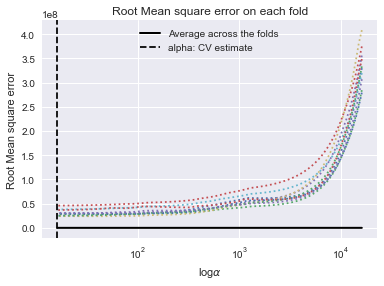

In [441]:
plt.semilogx(lscv.alphas_, lscv.mse_path_, linestyle=":")
plt.plot(
    lscv.alphas_,
    np.sqrt(lscv.mse_path_.mean(axis=1)),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lscv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel("log"r"$\alpha$")
ax.set_xscale("log")
plt.ylabel("Root Mean square error")
plt.legend()
_ = plt.title(
    f"Root Mean square error on each fold"
)

In [451]:
# Fit on test and train with ideal alpha

cvmod = Lasso(alpha=16, random_state=rdm, max_iter=100000)
cvmod.fit(trainX_poly, trainy)
yhatcv = cvmod.predict(testX_poly)

In [461]:
rmse(yhatcv, testy.to_numpy().ravel())

5786.946974319005

In [466]:
coeffcv = list(cvmod.coef_)

In [470]:
sigvarscv = {poly_names[i]:coeffcv[i] for i in range(len(poly_names))}

In [472]:
sigvarscv

{'1': 0.0,
 'x0': -0.0,
 'x1': 0.0,
 'x0^2': 17923.29981000625,
 'x0 x1': -0.0,
 'x1^2': 0.0,
 'x0^3': 0.0,
 'x0^2 x1': 0.0,
 'x0 x1^2': -0.0,
 'x1^3': 4530.8104377164655,
 'x0^4': -4247.510829939024,
 'x0^3 x1': 0.0,
 'x0^2 x1^2': 0.0,
 'x0 x1^3': -19855.99804251409,
 'x1^4': 5102.462887765503}

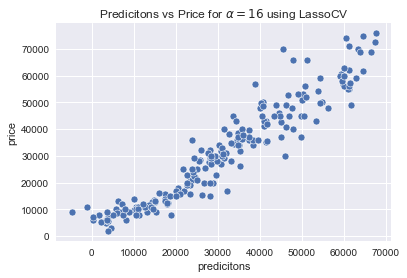

In [484]:
sns.scatterplot(x=yhatcv, y=testy.to_numpy().ravel())
plt.xlabel("predicitons")
plt.ylabel("price")
plt.title("Predicitons vs Price for " r"$\alpha=16$" " using LassoCV")
plt.show()

In [486]:
print("The RMSE on test data for alpha = 16 with LassoCV is: %.2f" % rmse(yhatcv, testy.to_numpy().ravel()))

The RMSE on test data for alpha = 16 with LassoCV is: 5786.95


- The model with the best performance used all 28 variables (polynomial, interaction, and categorical) with standard scaling and dummy encoding.  This was compared to AIC, BIC, and Kfold CV using tuning selection methods for the alpha hyperparamter.  
- I would want to explore ridge regression and other variable selection techniques as well.  Also, it would be prudent to look at further at the data and see if there were any assumptions that could better be considered and analyzed in using these modeling techniques.